# NumPy

<a href="https://colab.research.google.com/github/riccardoberta/machine-learning/blob/master/00-prerequisites/tools/numpy.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Google Colab"/></a>

NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions. An interesting scientific paper on the importance of NumPy can be found [here](https://www.nature.com/articles/s41586-020-2649-2)

Some vocabulary:
- each dimension is called an **axis**
- the number of axes is called the **rank**
- an array's list of axis lengths is called the **shape** of an arra
- the **size** of an array is the total number of elements, which is the product of all axis lengths

1. [Creating arrays](#Creating-arrays)
2. [Array data](#Array-data)
3. [Reshaping an array](#Reshaping-an-array)
4. [Mathematical functions](#Mathematical-functions)
5. [Array indexing](#Array-indexing)
6. [Iterating](#Iterating)
7. [Stacking arrays](#Stacking-arrays)
8. [Splitting arrays](#Splitting-arrays)
9. [Transposing arrays](#Transposing-arrays)
10. [Linear algebra](#Linear-algebra)
11. [Vectorization](#Vectorization)
12. [Saving and loading](#Saving-and-loading)

## Creating arrays

Now let's import numpy. Most people import it as np:

In [1]:
import numpy as np

### np.zeros
The **zero()** function creates an array containing any number of zeros:

In [2]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

To create a 2D array (ie. a matrix) we can provide a tuple with the desired number of rows and columns:

In [3]:
a = np.zeros((3,4))
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
print(a.shape)

(3, 4)


In [5]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
print('shape:', a.shape)
print('dim:',  a.ndim)
print('size:',  a.size)

shape: (3, 4)
dim: 2
size: 12


We can also create **n-dimensional array** of arbitrary rank: 

In [7]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

### np.ones

In [8]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### np.full
Creates an array of the given shape initialized with the given value.

In [9]:
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [10]:
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

### np.empty
An uninitialized array (its content is not predictable, as it is whatever is in memory at that point).

In [11]:
np.empty((2,3))

array([[0.e+000, 9.e-323, 0.e+000],
       [0.e+000, 0.e+000, 0.e+000]])

### np.array
Of course we can initialize an array using a regular python array

In [12]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

### np.arange
We can create an array using NumPy's arange function, which is similar to python's built-in range function. It also works with floats and we can provide a step parameter. However, when dealing with floats, the exact number of elements in the array is not always predictible.

In [13]:
np.arange(1, 5)

array([1, 2, 3, 4])

In [14]:
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

In [15]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [16]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


### np.linspace
It is generally preferable to use the linspace function instead of arange when working with floats. It returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is included, contrary to `arange`):

In [17]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


### np.rand
A number of functions are available in NumPy's random module to create arrays initialized with random values.
Here a matrix initialized with random floats with **uniform distribution**:

In [18]:
np.random.rand(3,4)

array([[0.0923508 , 0.29267845, 0.5514346 , 0.50753896],
       [0.63451705, 0.42319039, 0.24986462, 0.15913254],
       [0.27178095, 0.25390154, 0.75021957, 0.60036217]])

Here a matrix containing random floats sampled from a **normal distribution**:

In [19]:
np.random.randn(3,4)

array([[-0.08107945,  0.04894095, -0.09696899,  0.34251079],
       [-1.17229913, -0.01068869, -1.23119278, -0.94919485],
       [-0.02873338,  0.31072087, -0.18053398, -0.24452281]])

To get a feel of these distributions, we can use matplotlib:

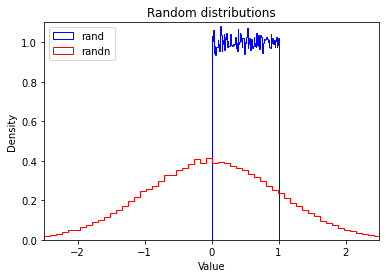

In [20]:
import matplotlib.pyplot as plt
plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

### np.fromfunction
You can also initialize an array using a function. The function is called with N parameters, where N is the rank of shape. The resulting array therefore has a value f(x, y) at coordinate (x, y).

In [21]:
def my_function(x,y):
    return x * y

np.fromfunction(my_function, (3, 4))

array([[0., 0., 0., 0.],
       [0., 1., 2., 3.],
       [0., 2., 4., 6.]])

## Array data

### dtype
NumPy's array are efficient in part because all their elements must have the same type (usually numbers). Available data types include **int8**, **int16**, **int32**, **int64**, **uint8|16|32|64**, **float16|32|64** and **complex64|128**. You can check what the data type is by looking at the dtype attribute. 

In [22]:
c = np.arange(1, 5)
print(c.dtype, c)

int64 [1 2 3 4]


In [23]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the dtype parameter

In [24]:
d = np.arange(1, 5, dtype=np.complex64)
print(d.dtype, d)

complex64 [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


### itemsize
The itemsize attribute returns the size (in bytes) of each item:

In [25]:
e = np.arange(1, 5, dtype=np.complex64)
e.itemsize

8

### data buffer
An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available via the data attribute (we will rarely need it).

In [26]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data
data_bytes = f.data.tobytes()
print(data_bytes)

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'


## Reshaping an array

### In place
Changing the shape of an array is as simple as setting its shape attribute. However, the array's size must remain the same.

In [27]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)
print("Size:", g.size)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1
Size: 24


In [28]:
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)
print("Size:", g.size)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2
Size: 24


In [29]:
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)
print("Size:", g.size)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3
Size: 24


### reshape
The reshape function returns a new array pointing at the **same data**. This means that modifying one array will also modify the other.

In [30]:
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999

In [31]:
g2[1, 2] = 999
print(g2)

[[  0   1   2   3   4   5]
 [  6   7 999   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]


The corresponding element in g has been modified.

In [32]:
print(g)

[[[  0   1   2   3]
  [  4   5   6   7]
  [999   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


### ravel
Finally, the ravel function returns a new one-dimensional array that also points to the same data:

In [33]:
g3 = g.ravel()
print(g3)

[  0   1   2   3   4   5   6   7 999   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23]


## Mathematical functions

### Arithmetic operations
All the usual arithmetic operators (+, -, /, //, etc.) can be used with array. They apply **elementwise**. Note that the multiplication is **not** a matrix multiplication. We will discuss matrix operations below. The arrays must have the same shape. If they do not, NumPy will apply the **broadcasting rules**.

In [34]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])

print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


### Broadcasting

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

**First rule**: if the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match:

In [35]:
h = np.arange(6).reshape(2,3)
print(h)

h1 = h + [2,3,4]
print(h1)

[[0 1 2]
 [3 4 5]]
[[2 4 6]
 [5 7 9]]


**Second rule**: arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension:

In [36]:
k = np.arange(6).reshape(2, 3)
print(k)

k1 = k + [[100], [200]]
print(k1)

[[0 1 2]
 [3 4 5]]
[[100 101 102]
 [203 204 205]]


Thanks to these rules, we can do something like that:

In [37]:
k2 = k + 1000
print(k2)

[[1000 1001 1002]
 [1003 1004 1005]]


**Third rule**: after rules 1 & 2, the sizes of all arrays must match

In [38]:
try:
    k3 = k + [33, 44]
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (2,) 


### Upcasting
When trying to combine arrays with different dtype, NumPy will **upcast** to a type capable of handling all possible values (regardless of what the actual values are)

In [39]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)

k2 = np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

k3 = k1 + k2
print(k3.dtype, k3)

k4 = k1 + 1.5
print(k4.dtype, k4)

uint8 [0 1 2 3 4]
int8 [5 6 7 8 9]
int16 [ 5  7  9 11 13]
float64 [1.5 2.5 3.5 4.5 5.5]


### Conditional operators
The conditional operators also apply elementwise and using broadcasting

In [40]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

In [41]:
m < 25

array([ True,  True, False, False])

### Statistical methods
Some functions are simply array methods:

In [42]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())
print("min =", a.min())
print("max =", a.max())
print("sum =", a.sum())
print("prod =", a.prod())
print("std =", a.std())
print("var =", a.var())

[[-2.5  3.1  7. ]
 [10.  11.  12. ]]
mean = 6.766666666666667
min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


These functions accept an optional argument **axis** which lets you ask for the operation to be performed on elements along the given axis

In [43]:
c = np.arange(6).reshape(2,3)
print(c)
print(c.shape)

print('sum across rows\n', c.sum(axis=0))
print('sum across columns\n', c.sum(axis=1))

[[0 1 2]
 [3 4 5]]
(2, 3)
sum across rows
 [3 5 7]
sum across columns
 [ 3 12]


### Universal functions
NumPy also provides fast elementwise functions called **universal functions**, or **ufunc**. They are vectorized wrappers of simple functions. For example square returns a new array which is a copy of the original array except that each element is squared

In [44]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print("Original ndarray")
print(a)

for func in (np.square, np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 square
[[  6.25   9.61  49.  ]
 [100.   121.   144.  ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[       nan 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


/var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/ipykernel_41938/3416111880.py:7: RuntimeWarning: invalid value encountered in sqrt
  print(func(a))
/var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/ipykernel_41938/3416111880.py:7: RuntimeWarning: invalid value encountered in log
  print(func(a))


### Binary ufuncs
There are also many binary ufuncs, that apply elementwise on two arrays, broadcasting rules are applied if the arrays do not have the same shape

In [45]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)

array([ 3,  6,  2, 11])

In [46]:
np.greater(a, b)

array([False, False,  True, False])

In [47]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [48]:
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

## Array indexing

### One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays

In [49]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [50]:
a[2:5]

array([ 3, 19, 13])

In [51]:
a[2:-1]

array([ 3, 19, 13,  7])

In [52]:
a[:2]

array([1, 5])

In [53]:
a[2::2]

array([ 3, 13,  3])

In [54]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

Of course, we can modify elements or slices:

In [55]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

In [56]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

If we assign a single value to a slice, it is copied across the whole slice, thanks to broadcasting rules

In [57]:
a[2:5] = -1
a

array([ 1,  5, -1, -1, -1,  7,  3])

**Slices are actually views** on the same data buffer. This means that if you create a slice and modify it, you are actually going to modify the original array as well

In [58]:
a_slice = a[2:6]
a_slice[1] = 1000
print(a)

[   1    5   -1 1000   -1    7    3]


In [59]:
a[3] = 2000
print(a_slice) 

[  -1 2000   -1    7]


If you want a copy of the data, you need to use the **copy** method:

In [60]:
another_slice = a[2:6].copy()
another_slice[1] = 3000
print(a)

[   1    5   -1 2000   -1    7    3]


In [61]:
a[3] = 4000
print(another_slice)

[  -1 3000   -1    7]


### Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas

In [62]:
b = np.arange(48).reshape(4, 12)
print(b)

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]


In [63]:
b[1, 2]  # row 1, col 2

14

In [64]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [65]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

Caution, note the subtle difference between these two expressions 

In [66]:
print(b[1, :])
print(b[1:2, :])

[12 13 14 15 16 17 18 19 20 21 22 23]
[[12 13 14 15 16 17 18 19 20 21 22 23]]


The first expression returns row 1 as a 1D array of shape (12,), while the second returns that same row as a 2D array of shape (1, 12)

You may also specify a list of indices that you are interested in. This is referred to as **fancy indexing**

In [67]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [68]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D array containing the values of the elements at the specified coordinates

In [69]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9]

array([41, 33, 37, 33])

### Higher dimensions
Everything works just as well with higher dimensional arrays

In [70]:
c = b.reshape(4,2,6)
print(c)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]]

 [[12 13 14 15 16 17]
  [18 19 20 21 22 23]]

 [[24 25 26 27 28 29]
  [30 31 32 33 34 35]]

 [[36 37 38 39 40 41]
  [42 43 44 45 46 47]]]


In [71]:
c[2, 1, 4]  # matrix 2, row 1, col 4

34

In [72]:
c[2, :, 3]  # matrix 2, all rows, col 3

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [73]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

You may also write an ellipsis (...) to ask that all non-specified axes be entirely included

In [74]:
c[2, ...]  #  matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [75]:
c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

In [76]:
c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

array([27, 33])

In [77]:
c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

### Boolean indexing
You can also provide an array of boolean values on one axis to specify the indices that you want to access.

In [78]:
b = np.arange(48).reshape(4, 12)
print(b)

rows_on = np.array([True, False, True, False])
print(b[rows_on, :])  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

cols_on = np.array([False, True, False] * 4)
print(b[:, cols_on])  # All rows, columns 1, 4, 7 and 10

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [24 25 26 27 28 29 30 31 32 33 34 35]]
[[ 1  4  7 10]
 [13 16 19 22]
 [25 28 31 34]
 [37 40 43 46]]


You cannot use boolean indexing on multiple axes, but you can work around this by using the **ix_** function

In [79]:
print(b[np.ix_(rows_on, cols_on)])

[[ 1  4  7 10]
 [25 28 31 34]]


## Iterating
Iterating over multidimensional arrays is done with respect to the first axis

In [80]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
for m in c:
    print("Item:")
    print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


If you want to iterate on all elements, simply iterate over the **flat** attribute:

In [81]:
for i in c.flat:
    print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


## Stacking arrays
It is often useful to stack together different arrays.

In [82]:
q1 = np.full((3,4), 1.0)
q2 = np.full((4,4), 2.0)
q3 = np.full((3,4), 3.0)
q4 = np.full((3,5), 4.0)

### vstack
Now let's stack them vertically

In [83]:
q5 = np.vstack((q1, q2, q3))
print(q5)
print(q5.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]
(10, 4)


### hstack
We can also stack arrays horizontally

In [84]:
q6 = np.hstack((q1, q3, q4))
print(q6)
print(q6.shape)

[[1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]]
(3, 13)


In [85]:
try:
    q7 = np.vstack((q1, q2, q3, q4))
except ValueError as e:
    print(e)
    
try:
    q8 = np.hstack((q1, q2, q3, q4))
except ValueError as e:
    print(e)

all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 3 has size 5
all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 4


### concatenate
The concatenate function stacks arrays along any given existing axis.

In [86]:
q9 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
print(q9)

q10 = np.concatenate((q1, q3, q4), axis=1)  # Equivalent to hstack
print(q10)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]
[[1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]]


### stack
The stack function stacks arrays along a new axis. All arrays have to have the same shape.

In [87]:
q11 = np.stack((q1, q3))
print(q11)
print(q11.shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[3. 3. 3. 3.]
  [3. 3. 3. 3.]
  [3. 3. 3. 3.]]]
(2, 3, 4)


## Splitting arrays
Splitting is the opposite of stacking.

### vsplit

In [88]:
r = np.arange(24).reshape(6,4)
print(r)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [89]:
r1, r2, r3 = np.vsplit(r, 3)
print(r1)
print(r2)
print(r3)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]
[[16 17 18 19]
 [20 21 22 23]]


### hsplit

In [90]:
r4, r5 = np.hsplit(r, 2)
print(r4)
print(r5)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [20 21]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]
 [22 23]]


### split

In [91]:
r6, r7, r8 = np.split(r, 3, axis=0)  # Equivalent to vsplit
print(r6)
print(r7)
print(r8)

r9, r10 = np.split(r, 2, axis=1)  # Equivalent to hsplit
print(r9)
print(r10)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]
[[16 17 18 19]
 [20 21 22 23]]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [20 21]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]
 [22 23]]


## Transposing arrays
The transpose method creates a new view on an array data, with axes permuted in the given order.

In [92]:
t = np.arange(24).reshape(4,2,3)
print(t)
print(t.shape)

t1 = t.transpose((1,2,0)) # axes 0, 1, 2 (depth, height, width) are re-ordered to 1, 2, 0
print(t1)
print(t1.shape)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]
(4, 2, 3)
[[[ 0  6 12 18]
  [ 1  7 13 19]
  [ 2  8 14 20]]

 [[ 3  9 15 21]
  [ 4 10 16 22]
  [ 5 11 17 23]]]
(2, 3, 4)


By default, transpose reverses the order of the dimensions

In [93]:
t2 = t.transpose()  # equivalent to t.transpose((2, 1, 0))
print(t2)
print(t2.shape)

[[[ 0  6 12 18]
  [ 3  9 15 21]]

 [[ 1  7 13 19]
  [ 4 10 16 22]]

 [[ 2  8 14 20]
  [ 5 11 17 23]]]
(3, 2, 4)


NumPy provides a convenience function **swapaxes** to swap two axes

In [94]:
t3 = t.swapaxes(0,1)  # equivalent to t.transpose((1, 0, 2))
print(t3)
print(t3.shape)

[[[ 0  1  2]
  [ 6  7  8]
  [12 13 14]
  [18 19 20]]

 [[ 3  4  5]
  [ 9 10 11]
  [15 16 17]
  [21 22 23]]]
(2, 4, 3)


## Linear algebra
NumPy arrays can be used to represent matrices efficiently. We will just quickly go through some of the main matrix operations available. For more details about Linear Algebra go through the [Linear Algebra](/00_linear_algebra_calculus/linear_algebra.ipynb) notebook.

### Matrix transpose
The T attribute is equivalent to calling transpose() when the rank is ≥2. The T attribute has no effect on rank 0 (empty) or rank 1 arrays

In [95]:
m1 = np.arange(10).reshape(2,5)
print(m1)

print(m1.T)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


In [96]:
m2 = np.arange(5)
print(m2)

print(m2.T)

[0 1 2 3 4]
[0 1 2 3 4]


We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [97]:
m2r = m2.reshape(1,5)
print(m2r)

print(m2r.T)

[[0 1 2 3 4]]
[[0]
 [1]
 [2]
 [3]
 [4]]


### Matrix multiplication

In [98]:
n1 = np.arange(10).reshape(2, 5)
print(n1)

n2 = np.arange(15).reshape(5,3)
print(n2)

n3 = n1.dot(n2)
print(n3)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 90 100 110]
 [240 275 310]]


### Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the **numpy.linalg** module, in particular the **inv** function to compute a square matrix's inverse and **pinv** to calculate the matrix's pseudoinverse

In [99]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
print(m3)

m4 = linalg.inv(m3)
print(m4)

m5 = linalg.pinv(m3)
print(m5)

[[ 1  2  3]
 [ 5  7 11]
 [21 29 31]]
[[-2.31818182  0.56818182  0.02272727]
 [ 1.72727273 -0.72727273  0.09090909]
 [-0.04545455  0.29545455 -0.06818182]]
[[-2.31818182  0.56818182  0.02272727]
 [ 1.72727273 -0.72727273  0.09090909]
 [-0.04545455  0.29545455 -0.06818182]]


### Identity matrix
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors)

In [100]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -5.55111512e-17,  0.00000000e+00],
       [-2.98372438e-16,  1.00000000e+00, -5.55111512e-17],
       [ 5.78009862e-15,  1.27675648e-15,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling **eye** function

In [101]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Determinant

In [102]:
linalg.det(m3)

43.99999999999999

### Eigenvalues and eigenvectors

In [103]:
eigenvalues, eigenvectors = linalg.eig(m3)
print(eigenvalues)
print(eigenvectors)

[42.26600592 -0.35798416 -2.90802176]
[[-0.08381182 -0.76283526 -0.18913107]
 [-0.3075286   0.64133975 -0.6853186 ]
 [-0.94784057 -0.08225377  0.70325518]]


### Singular Value Decomposition

In [104]:
m6 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
print("M=\n", m6)

U, S_diag, V = linalg.svd(m6)
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag

print("U=\n", U)
print("S=\n", S)
print("V=\n", V)

print("U*S*V=\n", U.dot(S).dot(V))

M=
 [[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 2 0 0 0]]
U=
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
S=
 [[3.         0.         0.         0.         0.        ]
 [0.         2.23606798 0.         0.         0.        ]
 [0.         0.         2.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
V=
 [[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]
U*S*V=
 [[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]


### Diagonal and trace

In [105]:
np.diag(m6)  # the values in the diagonal of m3 (top left to bottom right)

array([1, 0, 0, 0])

In [106]:
np.trace(m6)  # equivalent to np.diag(m3).sum()

1

### Solving a system of linear scalar equations

* $2x + 6y = 6$
* $5x + 3y = -9$

In [107]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

## Vectorization
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called **vectorization**. This way, you can benefit from NumPy's many optimizations.

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A bad option would be to do the math in python using nested loops:

In [108]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's **vectorize this algorithm**. First, we will use NumPy's **meshgrid** function which generates coordinate matrices from coordinate vectors.

In [109]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
print("X=\n", X)
print("Y=\n", Y)

X=
 [[   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 ...
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]]
Y=
 [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [765 765 765 ... 765 765 765]
 [766 766 766 ... 766 766 766]
 [767 767 767 ... 767 767 767]]


As you can see, both X and Y are 768x1024 arrays, and all values in X correspond to the horizontal coordinate, while all values in Y correspond to the the vertical coordinate. Now we can simply compute the result using array operation

In [110]:
data = np.sin(X*Y/40.5)

## Saving and loading
NumPy makes it easy to save and load arrays in binary or text format

### Binary format

In [111]:
a = np.random.rand(2,3)
print(a)

[[0.83882094 0.10402848 0.35732647]
 [0.09120324 0.49132963 0.19281581]]


In [112]:
np.save("my_array", a)

Since the file name contains no extension, NumPy automatically added .npy

In [113]:
with open("my_array.npy", "rb") as f:
    content = f.read()
print(content)

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n&\xb6\x82\x02\x9f\xd7\xea?X\x8ap9\x9c\xa1\xba?\\(\xfc\xd4o\xde\xd6?\xe8p\x88\x82\x18Y\xb7?N#\xb7\xd6\xf1q\xdf?`H=:0\xae\xc8?"


To load this file into a NumPy array, simply call **load**

In [114]:
a_loaded = np.load("my_array.npy")
print(a_loaded)

[[0.83882094 0.10402848 0.35732647]
 [0.09120324 0.49132963 0.19281581]]


### Text format

In [115]:
np.savetxt("my_array", a)

Now let's look at the file content:

In [116]:
with open("my_array", "rt") as f:
    print(f.read())

8.388209389719960551e-01 1.040284767373490515e-01 3.573264675075102925e-01
9.120324313011318740e-02 4.913296315030962758e-01 1.928158077594757103e-01



In [117]:
a_loaded = np.loadtxt("my_array")
a_loaded

array([[0.83882094, 0.10402848, 0.35732647],
       [0.09120324, 0.49132963, 0.19281581]])

### CSV format

In [118]:
np.savetxt("my_array.csv", a, delimiter=",")

In [119]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.83882094, 0.10402848, 0.35732647],
       [0.09120324, 0.49132963, 0.19281581]])

### Zipped format
It is also possible to save multiple arrays in one zipped file:

In [120]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)

np.savez("my_arrays", my_a=a, my_b=b)

In [121]:
my_arrays = np.load("my_arrays.npz")
print(my_arrays["my_a"])
print(my_arrays["my_b"])

[[0.83882094 0.10402848 0.35732647]
 [0.09120324 0.49132963 0.19281581]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
